In [36]:
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    from matplotlib import pyplot as plt
    import seaborn as sns

In [4]:
data = pd.read_csv('sample_submission.csv')
data

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [10]:
train = pd.read_csv('/content/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
test=pd.read_csv('/content/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [12]:
train.shape

(1460, 81)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [16]:
train.duplicated().sum()


0

In [17]:
train.isnull().sum()


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [19]:
train.isnull().sum().sort_values(ascending=False).head(20)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [20]:
train.drop(["Id","Alley", "PoolQC","FireplaceQu", "Fence", "MiscFeature"] ,axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [21]:
train.isnull().sum().sort_values(ascending=False).head(15)

,0
MasVnrType,872
LotFrontage,259
GarageCond,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageType,81
BsmtFinType2,38
BsmtExposure,38
BsmtFinType1,37


In [22]:
train.drop(["Condition2"] ,axis=1, inplace=True)
train['Total_floors'] = train['1stFlrSF'] + train['2ndFlrSF']
train['Total_floors'].head()

,Total_floors
0,1710
1,1262
2,1786
3,1717
4,2198


In [23]:
train['Total_porch_area'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train['Total_porch_area'].head()

,Total_porch_area
0,61
1,0
2,42
3,307
4,84


In [24]:
train['TotalBsmtFinSF'] = train['BsmtFinSF1'] + train['BsmtFinSF2']
train['TotalFullBath'] = train['BsmtFullBath'] +  train['FullBath']
train['TotalHalfBath'] =  train['BsmtHalfBath'] + train['HalfBath']
train.drop(["BsmtFullBath","FullBath","BsmtHalfBath","HalfBath","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","OverallCond","OverallQual","1stFlrSF","2ndFlrSF","BsmtFinSF1","BsmtFinSF2"] ,axis=1, inplace=True)
zoning_sale_group = train.groupby(['MSZoning', 'SaleCondition']).size().reset_index(name='Counts')
zoning_sale_group

,MSZoning,SaleCondition,Counts
0,C (all),Abnorml,5
1,C (all),Alloca,1
2,C (all),Normal,4
3,FV,Abnorml,4
4,FV,Normal,39
5,FV,Partial,22
6,RH,Abnorml,5
7,RH,Normal,11
8,RL,Abnorml,70
9,RL,AdjLand,4


In [25]:
numeric_col = [col for col in train.columns if train[col].dtype != 'object']
categorical_col = [col for col in train.columns if train[col].dtype == 'object']
for col in numeric_col:
    if train[col].isnull().sum() > 0:
        median_value = train[col].mean()
        train[col].fillna(median_value, inplace=True)
train.isna().sum()

<ipython-input-25-c771a92dbfe5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_value, inplace=True)


,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
Total_floors,0
Total_porch_area,0
TotalBsmtFinSF,0
TotalFullBath,0


In [26]:
for col in categorical_col:
    if train[col].isnull().sum() > 0:
        mode_value = train[col].mode()[0]
        train[col].fillna(mode_value, inplace=True)
train.isna().sum()

<ipython-input-26-f74224ce88cc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(mode_value, inplace=True)


,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
Total_floors,0
Total_porch_area,0
TotalBsmtFinSF,0
TotalFullBath,0


In [27]:
def detect_outliers(train, column):
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
    return outliers


outliers_info = {}

for col in train.select_dtypes(include="number").columns:
    outliers = detect_outliers(train, col)
    if not outliers.empty:
        outliers_info[col] = len(outliers)
        print(f"Column '{col}' has {len(outliers)} outliers.")

if outliers_info:
    print("\nColumns with detected outliers:")
    for col, count in outliers_info.items():
        print(f"{col}: {count} outliers")
else:
    print("No outliers detected in the numerical columns.")

Column 'MSSubClass' has 103 outliers.
Column 'LotFrontage' has 106 outliers.
Column 'LotArea' has 69 outliers.
Column 'YearBuilt' has 7 outliers.
Column 'MasVnrArea' has 98 outliers.
Column 'BsmtUnfSF' has 29 outliers.
Column 'TotalBsmtSF' has 61 outliers.
Column 'LowQualFinSF' has 26 outliers.
Column 'GrLivArea' has 31 outliers.
Column 'BedroomAbvGr' has 35 outliers.
Column 'KitchenAbvGr' has 68 outliers.
Column 'TotRmsAbvGrd' has 30 outliers.
Column 'Fireplaces' has 5 outliers.
Column 'GarageYrBlt' has 1 outliers.
Column 'GarageCars' has 5 outliers.
Column 'GarageArea' has 21 outliers.
Column 'WoodDeckSF' has 32 outliers.
Column 'PoolArea' has 7 outliers.
Column 'MiscVal' has 52 outliers.
Column 'SalePrice' has 61 outliers.
Column 'Total_floors' has 28 outliers.
Column 'Total_porch_area' has 44 outliers.
Column 'TotalBsmtFinSF' has 6 outliers.
Column 'TotalFullBath' has 19 outliers.
Column 'TotalHalfBath' has 4 outliers.

Columns with detected outliers:
MSSubClass: 103 outliers
LotFr

In [28]:
train.drop(["GarageArea"] ,axis=1, inplace=True)
train.drop(["GarageYrBlt"] ,axis=1, inplace=True)
df_cleaned = train.copy()
df_cleaned.shape

(1460, 63)

In [29]:
numeric_columns = [col for col in df_cleaned.columns if df_cleaned[col].dtype != 'object']
categorical_columns = [col for col in df_cleaned.columns if df_cleaned[col].dtype == 'object']
from sklearn.preprocessing import LabelEncoder
one_hot_encoded_data = pd.get_dummies(df_cleaned, columns = categorical_columns)
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
one_hot_encoded_data = df_cleaned
from sklearn.preprocessing import LabelEncoder
one_hot_encoded_data = pd.get_dummies(df_cleaned, columns = categorical_columns)
X = df_cleaned.drop(columns=['SalePrice'])
y = df_cleaned['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1239693417.4925182


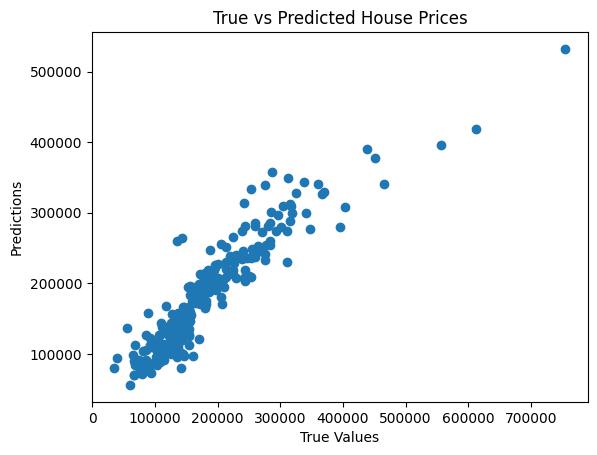

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted House Prices')
plt.show()

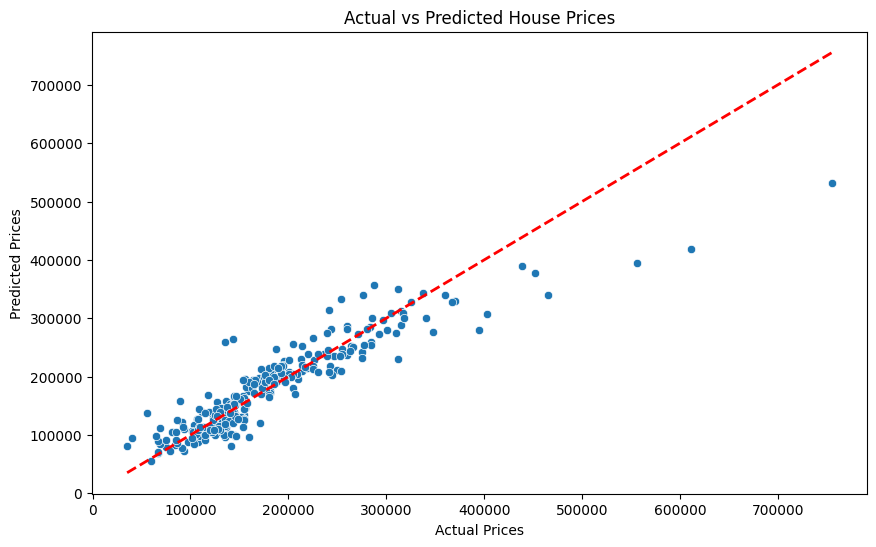

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()